/var/folders/7c/njhnznd516q7rp062p21kv500000gn/T/ipykernel_17190/2184336679.py:31: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(


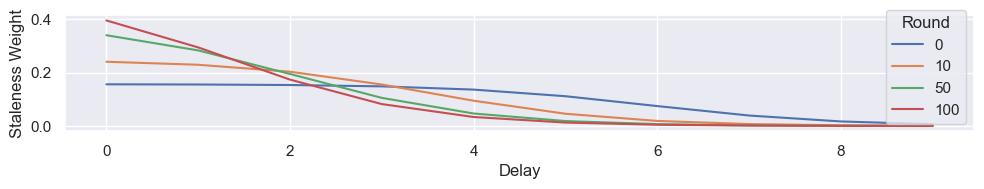

In [6]:
import pandas as pd
import seaborn as sns
import torch
import numpy as np
import matplotlib.pyplot as plt

delays = np.arange(10).astype(float)
lambda_ = 1000


def func(d, t):
    d = torch.tensor(d).float()
    weights = torch.ones_like(d)
    weights /=  (1+ torch.exp((d + 1))) + (lambda_ / (t + 1))
    weights /= weights.sum()
    return weights.numpy()

df = pd.concat([
    pd.DataFrame({'Delay': delays, 'Staleness Weight': func(delays, 0), 'Round': [0] * 10}),
    pd.DataFrame({'Delay': delays, 'Staleness Weight': func(delays, 10), 'Round': [10]*10}),
    pd.DataFrame({'Delay': delays, 'Staleness Weight': func(delays, 50), 'Round': [50]*10}),
    pd.DataFrame({'Delay': delays, 'Staleness Weight': func(delays, 100), 'Round': [100]*10}),
])


sns.set()

fig,ax = plt.subplots(figsize = (10,2))


sns.lineplot(
    data = df,
    x = 'Delay',
    y = 'Staleness Weight',
    hue = 'Round',
    palette=sns.color_palette(),
    # height = 1.5,
    # aspect = .5,
    ax = ax
)

# fig.figure.set(figsize=(8,1.5))

# plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.tight_layout()
# plt.savefig('../figures/staleness_weighting.pdf', bbox_inches='tight')